In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = "C:/Users/bhos0364/OneDrive - The University of Sydney (Staff)/Desktop/Python/PLSR/Arawa/arawa_sen2_final_data.csv" 
data = pd.read_csv(file_path)
data

,B02_10m,B03_10m,B04_10m,B08_10m,B01_20m,B05_20m,B06_20m,B07_20m,B11_20m,B12_20m,OC
0,2871.612549,3315.794678,3919.491699,4553.675781,2571.536621,4232.095215,4292.546875,4433.568359,6298.714844,5621.738281,0.40
1,3060.851562,3482.150146,4041.853027,4631.871582,2685.424561,4318.727051,4375.923340,4511.015625,6311.028809,5891.376465,0.39
2,2782.225830,3142.157227,3663.560791,4326.357910,2349.041504,3874.521729,3945.858887,4109.245605,5990.341797,5254.301270,0.54
3,2522.029297,3105.971680,3919.409424,4610.888184,2395.714844,4170.657227,4243.469727,4422.196777,6252.243164,5318.319336,0.34
4,3349.963867,3810.879150,4405.110352,5087.749023,2860.269775,4639.945801,4645.516113,4802.951172,6718.313965,6104.833496,0.22
5,2324.364258,2671.708740,3275.741699,4174.403809,2168.135986,3622.088623,3745.804932,3967.144043,5809.029785,4700.831543,0.41
6,2388.343262,2761.948975,3369.567871,4242.225586,2099.587646,3751.777100,3839.974121,4052.733887,5993.899902,5033.556152,0.15
7,2925.773193,3350.028076,3921.481445,4525.011230,2600.057617,4181.593262,4228.645996,4376.212402,6193.743164,5593.090820,0.46
8,2632.799072,2951.191406,3487.488770,4206.856934,2424.588867,3770.287354,3875.281494,4044.964844,5935.888672,5127.208496,0.41
9,2206.456299,2627.500488,3202.423340,3928.844971,2028.088623,3523.003906,3601.150879,3766.285156,5758.407715,4780.689453,0.43


In [7]:
# Prepare the features and target
X = data.drop(columns=['OC'])
y = data['OC']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define an expanded parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
X_scaled, param_grid

(array([[ 1.01069260e+00,  1.02541488e+00,  1.01685990e+00,
          8.68194582e-01,  1.09990225e+00,  1.13027081e+00,
          1.14986058e+00,  1.08999036e+00,  1.14214532e+00,
          1.11569607e+00],
        [ 1.56559643e+00,  1.49727789e+00,  1.36822187e+00,
          1.11542044e+00,  1.52104173e+00,  1.39027294e+00,
          1.41547526e+00,  1.34651692e+00,  1.19062441e+00,
          1.69563258e+00],
        [ 7.48584744e-01,  5.32896708e-01,  2.81951337e-01,
          1.49500533e-01,  2.77150717e-01,  5.71102562e-02,
          4.54071616e-02,  1.57445897e-02, -7.18945316e-02,
          3.25414306e-01],
        [-1.43871676e-02,  4.30257335e-01,  1.01662365e+00,
          1.04907879e+00,  4.49741300e-01,  9.45881225e-01,
          9.93514162e-01,  1.05232457e+00,  9.59190060e-01,
          4.63104056e-01],
        [ 2.41335779e+00,  2.42970926e+00,  2.41131948e+00,
          2.55673433e+00,  2.16759151e+00,  2.35432453e+00,
          2.27432434e+00,  2.31348739e+00,  2.794073

In [8]:
# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize LOOCV (Leave-One-Out Cross-Validation)
loo = LeaveOneOut()

# Perform Grid Search with LOOCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=loo, scoring='r2', n_jobs=-1, verbose=1)

# Fit the model with LOOCV
grid_search.fit(X_scaled, y)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Refit the Random Forest model with the best parameters
best_rf_model = grid_search.best_estimator_
print(best_rf_model)
# Predictions with the best model using LOOCV
y_pred_tuned = best_rf_model.predict(X_scaled)
print(y_pred_tuned)

Fitting 25 folds for each of 216 candidates, totalling 5400 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=42)
[0.3637 0.3424 0.4916 0.3871 0.2518 0.4047 0.2692 0.4257 0.4366 0.4547
 0.8162 0.4019 0.4382 0.5386 0.6642 0.3941 0.8356 0.6947 0.3175 0.3824
 0.4084 0.3821 0.3063 0.473  0.6375]


In [9]:
# Calculate evaluation metrics for the tuned model
rmse_tuned = np.sqrt(mean_squared_error(y, y_pred_tuned))
r2_tuned = r2_score(y, y_pred_tuned)
mae_tuned = mean_absolute_error(y, y_pred_tuned)

# Print evaluation metrics
print(f"RMSE: {rmse_tuned}")
print(f"R-squared: {r2_tuned}")
print(f"MAE: {mae_tuned}")

RMSE: 0.05332451593779351
R-squared: 0.9183066414150702
MAE: 0.04315199999999992


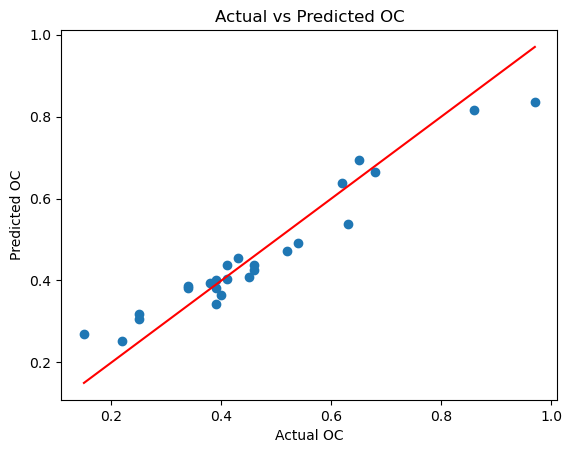

In [10]:
# Plot Actual vs Predicted values to assess the fit visually
plt.scatter(y, y_pred_tuned)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # Line representing perfect prediction
plt.xlabel('Actual OC')
plt.ylabel('Predicted OC')
plt.title('Actual vs Predicted OC')
plt.show()